# LEVEL 2

In [1]:
import pandas as pd

In [2]:
data=pd.read_csv("C:/Users/Princia/Downloads/Restaurant Dataset.csv")
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


# Task 1

In [3]:
#Analyzing the distribution of aggregate ratings and determining the most common rating range.
bins = [0, 1, 2, 3, 4, 5]
data['Rating Bin'] = pd.cut(data['Aggregate rating'], bins=bins, right=False)
rating_counts = data['Rating Bin'].value_counts()
print(rating_counts)


Rating Bin
[3, 4)    4590
[0, 1)    2148
[2, 3)    1430
[4, 5)    1380
[1, 2)       3
Name: count, dtype: int64


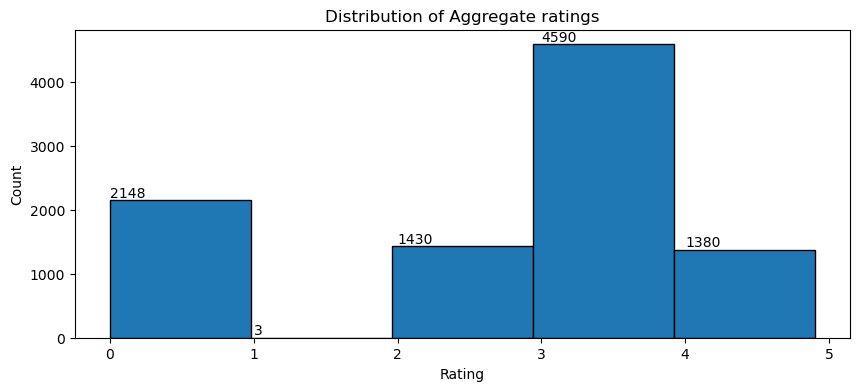

In [4]:
import numpy as np
import matplotlib.pyplot as plt 
rating=np.array(data['Aggregate rating'].values)

plt.figure(figsize=(10,4))
hist=plt.hist(rating,bins=5,edgecolor='black')
for i ,count in enumerate(hist[0]):
    plt.text(bins[i],count,f'{int(count)}',ha='left',va='bottom')
plt.title('Distribution of Aggregate ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [5]:
print("The Most common rating range is",rating_counts.index[0],f'with {rating_counts.values[0]} count of ratings')

The Most common rating range is [3, 4) with 4590 count of ratings


In [6]:
#Calculating the average number of votes received by restaurants.
data['Restaurant Name'].value_counts()

Restaurant Name
Cafe Coffee Day             83
Domino's Pizza              79
Subway                      63
Green Chick Chop            51
McDonald's                  48
                            ..
Odeon Social                 1
Johnny Rockets               1
House of Commons             1
HotMess                      1
Walter's Coffee Roastery     1
Name: count, Length: 7446, dtype: int64

In [7]:
data['Restaurant Name'].value_counts()
print("The average number of votes received by each restaurant is")
votes=data.groupby('Restaurant Name')['Votes'].mean()
votes.sort_values(ascending=False)

The average number of votes received by each restaurant is


Restaurant Name
Toit                            10934.0
Hauz Khas Social                 7931.0
Peter Cat                        7574.0
Big Brewsky                      5705.0
The Black Pearl                  5385.0
                                 ...   
Cafe Treat                          0.0
Ralhan Eating Corner                0.0
Raju Vaishno Amritsari Dhaba        0.0
The Golden Spoon                    0.0
Shree Vinayaga Restaurant           0.0
Name: Votes, Length: 7446, dtype: float64

# Task 2

In [8]:
#Identify the most common combinations of cuisines in the dataset.

data['Cuisines'].unique()

array(['French, Japanese, Desserts', 'Japanese',
       'Seafood, Asian, Filipino, Indian', ..., 'Burger, Izgara',
       'World Cuisine, Patisserie, Cafe', 'Italian, World Cuisine'],
      dtype=object)

In [9]:
from collections import Counter
combination_count=Counter()
Cuisines_split=[]
for item in data['Cuisines'].astype(str):
    parts=item.split(',')
    parts=tuple(parts)
    if len(parts)>1:
        Cuisines_split.append(parts)
df=pd.DataFrame({'Cuisines_split':Cuisines_split})
combination_count=Counter(df['Cuisines_split'])
common_combo,count=combination_count.most_common(1)[0]
print("The most common combinations of cuisines in the dataset is",common_combo,'with count',count)

The most common combinations of cuisines in the dataset is ('North Indian', ' Chinese') with count 511


In [10]:
#Determine if certain cuisine combinations tend to have higher ratings.

In [11]:
df['Rating']=data['Aggregate rating']
df[df['Cuisines_split'] == common_combo]['Rating'].tolist()
print("Most Common combination of cuisines is ",common_combo)

Most Common combination of cuisines is  ('North Indian', ' Chinese')


In [12]:
df

,Cuisines_split,Rating
0,"(French, Japanese, Desserts)",4.8
1,"(Seafood, Asian, Filipino, Indian)",4.5
2,"(Japanese, Sushi)",4.4
3,"(Japanese, Korean)",4.9
4,"(Asian, European)",4.8
...,...,...
6143,"(Restaurant Cafe, Turkish, Desserts)",4.4
6144,"(Desserts, B�_rek)",4.4
6145,"(Burger, Izgara)",4.1
6146,"(World Cuisine, Patisserie, Cafe)",2.9


In [13]:
rating=df[df['Cuisines_split'] == common_combo]['Rating'].mean()
print("The average rating of the most common combination is %.2f"%(rating))

The average rating of the most common combination is 2.56


# Task 3

In [14]:
pip install geopandas

Note: you may need to restart the kernel to use updated packages.


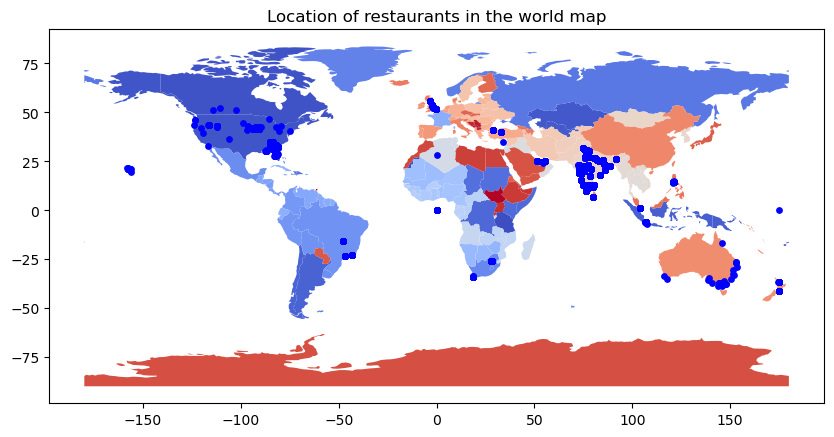

In [15]:
#Plot the locations of restaurants on a map using longitude and latitude coordinates
from shapely.geometry import Point 
location=[Point(x,y) for x,y in zip(data['Longitude'],data['Latitude'])]

import geopandas as gpd
gdf=gpd.GeoDataFrame(data,geometry=location)
path='C:/Users/Princia/Downloads/110m_cultural'
world_map=gpd.read_file(path,layer='ne_110m_admin_0_countries')

gdf.plot(ax=world_map.plot(figsize=(10,6),cmap='coolwarm'),marker='o',color='blue',markersize=15)
plt.title("Location of restaurants in the world map")
plt.show()

In [16]:
#Identify any patterns or clusters of restaurants in specific areas.

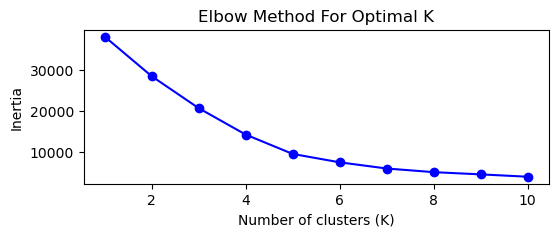

In [17]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings
data_location = pd.DataFrame({"Latitude":data["Latitude"],"Longitude":data[ "Longitude"],'Aggregate rating':data['Aggregate rating'],'Price range':data['Price range']})
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_location)
inertia = []

K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k,n_init=10, random_state=0)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 2))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

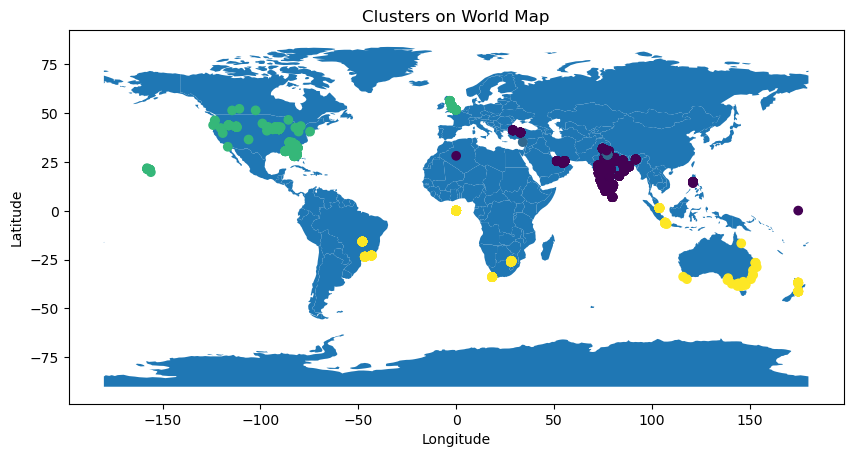

In [18]:
k=4
kmeans = KMeans(n_clusters=k,n_init=10, random_state=42)

# Fit the model to your data
kmeans.fit(data_scaled)

# Get cluster assignments for each data point
cluster_labels = kmeans.labels_

# Add cluster labels to the DataFrame
data_location["Cluster"] = cluster_labels

# Visualize the clusters
gdf.plot(ax=world_map.plot(figsize=(10,6)), column=data_location["Cluster"])

plt.title("Clusters on World Map")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [19]:
for cluster in range(k):
    cluster_data = data_location[data_location['Cluster'] == cluster]
    print(f"\nCluster {cluster}:")
    print(cluster_data.describe())


Cluster 0:
          Latitude    Longitude  Aggregate rating  Price range  Cluster
count  6452.000000  6452.000000       6452.000000  6452.000000   6452.0
mean     27.783379    76.945736          3.369095     1.910105      0.0
std       3.336744     5.365017          0.520546     0.900736      0.0
min       0.000000     0.000000          1.800000     1.000000      0.0
25%      28.495053    77.108885          3.000000     1.000000      0.0
50%      28.570240    77.205815          3.300000     2.000000      0.0
75%      28.640044    77.285548          3.700000     2.000000      0.0
max      41.104969   174.779441          4.900000     4.000000      0.0

Cluster 1:
          Latitude    Longitude  Aggregate rating  Price range  Cluster
count  1860.000000  1860.000000       1860.000000  1860.000000   1860.0
mean     28.602350    77.145643          0.004247     1.225806      1.0
std       0.577965     2.092434          0.091537     0.490447      0.0
min      28.363058    -1.888555         

# Task 4

In [20]:
#Identifying if there are any restaurant chains present in the dataset.
restaurant_count=data['Restaurant Name'].value_counts()
restaurant_data=restaurant_count[restaurant_count>1].index
restaurant_df=data[data['Restaurant Name'].isin(restaurant_data)]
print("Resturants chains: ")
restaurant_df['Restaurant Name'].value_counts()

Resturants chains: 


Restaurant Name
Cafe Coffee Day        83
Domino's Pizza         79
Subway                 63
Green Chick Chop       51
McDonald's             48
                       ..
VadaPav 'n' Frankie     2
Bikaner Kesarvala       2
6 Pack Momos            2
The Mirch Masala        2
D�_vero��lu             2
Name: count, Length: 734, dtype: int64

In [21]:
#Analyze the ratings and popularity of different restaurant chains.
print("Analyzing the ratings:")
rating=restaurant_df.groupby('Restaurant Name')['Aggregate rating'].mean().sort_values(ascending=False)
print(rating.head())

Analyzing the ratings:
Restaurant Name
Talaga Sampireun             4.900
Silantro Fil-Mex             4.850
AB's Absolute Barbecues      4.850
AB's - Absolute Barbecues    4.825
Naturals Ice Cream           4.800
Name: Aggregate rating, dtype: float64


In [22]:
print("Analyzing the Votes:")
votes=restaurant_df.groupby('Restaurant Name')['Votes'].mean().sort_values(ascending=False)
print(votes.head())

Analyzing the Votes:
Restaurant Name
Truffles                     4841.000000
Joey's Pizza                 3903.500000
AB's - Absolute Barbecues    3350.000000
Big Chill                    2713.250000
Big Yellow Door              2503.666667
Name: Votes, dtype: float64
